# Section 2
You would have received a US_Arrest_Data.zip file with 8 datasets in .csv format and 3 data dictionaries in .docx format. You may or may not use all the datasets during this assessment.

In [71]:
## Imports
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm
from scipy import stats
import os
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})

In [2]:
## DEFINE DATA PATH OF INTEREST
US_ARREST_DATA_DIR = os.path.join(os.getcwd(), "data", "US_Arrest_Data")

Dataset to consider:
- **US State related data**:
    *USArrest*: A data frame with 50 observations on 4 variables. It contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.

    |Column|Type|Description|
    |---|---|---|
    |Murder|numeric|Murder arrests (per 100,000) in 1973|
    |Assault|numeric|Assault arrests (per 100,000) in 1973|
    |UrbanPop|numeric|Percent urban population in 1973|
    |Rape|numeric|Rape arrests (per 100,000) in 1973|
    
    <br/>
    
    For the following datasets, based on the dictionary provided which indicates all data are arranged according to alphabetical order of the state names, we just simply join the information rowwise by index.

    *USstatedivision*: Factor giving state divisions (New England, Middle Atlantic, South Atlantic, East South Central, West South Central, East North Central, West North Central, Mountain, and Pacific).
    
    *USstateregion*: Factor giving the region (Northeast, South, North Central, West) that each state belongs to.
    
    *USstatex77*: Matrix with 50 rows and 8 columns giving the following statistics in the respective columns as follows:
    <br/>
    <br/>
    
    |Column|Description|
    |---|---|
    |Population|Population estimate as of July 1, 1975|
    |Income|Per capita income (1974)|
    |Illiteracy|Illiteracy (1970, percent of population)|
    |Life Exp|Life expectancy in years (1969–71)|
    |Murder|Murder and non-negligent manslaughter rate per 100,000 population (1976)|
    |HS Grad|Percent high-school graduates (1970)|
    |Frost|Mean number of days with minimum temperature below freezing (1931–1960) in capital or large city|
    |Area|Land area in square miles|

    Based on information provided via page 24 of Chapter 6 the United States Census Bureau document accessable via: https://www2.census.gov/geo/pdfs/reference/GARM/Ch6GARM.pdf, and noting the data is based on 1970s, it is noted that reach US region can be further segmented into divisions as follows, which can be used as a countercheck when joining the above 3 dataset together:

    |Region|Division|
    |---|---|
    |Northeast|New England, Middle Atlantic|
    |North Central Region|East North Central, West North Central|
    |South|South Atlantic, East South Central, West South Central|
    |West|Mountain, Pacific|


Other state datasets not considered:
|Dataset|Description|Reason for not including|
|---|---|---|
|*USstateabb*|character vector of 2-letter abbreviations for the state names.|This is included in *USStatex77* dataset.|
|*USstatearea*|Numeric vector of state areas (in square miles).| Such data is included in *USStatex77* dataset and only some form of identifier is provided instead of actual state name.|
|*USstatecenter*|List with components named x and y giving the approximate geographic center of each state in negative longitude and latitude.Alaska and Hawaii are placed just off the West Coast.|Geographic coordinates of states is not an useful feature for categorisation since we cannot compare such data between states.|


In [3]:
# Required data files path and load data
US_STATE_DIVISION_PATH = os.path.join(US_ARREST_DATA_DIR, "USstatedivision.csv")
US_STATE_REGION_PATH = os.path.join(US_ARREST_DATA_DIR, "USstateregion.csv")
US_STATE_MATRIX_PATH = os.path.join(US_ARREST_DATA_DIR, "USstatex77.csv")
US_ARREST_DATA_PATH = os.path.join(US_ARREST_DATA_DIR, "USArrest.csv")

us_state_division_df = pd.read_csv(US_STATE_DIVISION_PATH,
                                   sep=",",
                                   header=0)
us_state_region_df = pd.read_csv(US_STATE_REGION_PATH,
                                 sep=",",
                                 header=0)
us_state_matrix_df = pd.read_csv(US_STATE_MATRIX_PATH,
                                 sep=",",
                                 header=0)

us_state_arrest_df = pd.read_csv(US_ARREST_DATA_PATH,
                                 sep=",",
                                 header=0)


Quick check on respective data entries type.

A quick check on actual data and summary of data indicates that there is no nulls. So we can simply work with the data without any imputation.

In [4]:
print(us_state_division_df.head())
us_state_division_df.info()

   Unnamed: 0                   x
0           1  East South Central
1           2             Pacific
2           3            Mountain
3           4  West South Central
4           5             Pacific
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50 non-null     int64 
 1   x           50 non-null     object
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


In [5]:
print(us_state_region_df.head())
us_state_region_df.info()

   Unnamed: 0      x
0           1  South
1           2   West
2           3   West
3           4  South
4           5   West
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50 non-null     int64 
 1   x           50 non-null     object
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


In [6]:
# Drop Unnamed column
us_state_division_df.drop(columns="Unnamed: 0", inplace=True)
us_state_region_df.drop(columns="Unnamed: 0", inplace=True)

# Rename columns of US State division/region to meaningful names
us_state_division_df.rename(columns={"x": "Division"}, inplace=True)
us_state_region_df.rename(columns={"x": "Region"}, inplace=True)

In [7]:
print(us_state_matrix_df.head())

# Rename the 'Unnamed: 0' column to meaningful name
us_state_matrix_df.rename(columns={"Unnamed: 0": "State", "Murder": "Murder_Manslaughter_Rate_per100K"}, inplace=True)

us_state_matrix_df.info()

   Unnamed: 0  Population  Income  Illiteracy  Life Exp  Murder  HS Grad  \
0     Alabama        3615    3624         2.1     69.05    15.1     41.3   
1      Alaska         365    6315         1.5     69.31    11.3     66.7   
2     Arizona        2212    4530         1.8     70.55     7.8     58.1   
3    Arkansas        2110    3378         1.9     70.66    10.1     39.9   
4  California       21198    5114         1.1     71.71    10.3     62.6   

   Frost    Area  
0     20   50708  
1    152  566432  
2     15  113417  
3     65   51945  
4     20  156361  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   State                             50 non-null     object 
 1   Population                        50 non-null     int64  
 2   Income                            50 non-null     int64  
 3   Illiter

In [8]:
print(us_state_arrest_df.head())

# Rename the 'Unnamed: 0' column to meaningful name
us_state_arrest_df.rename(columns={"Unnamed: 0": "State", "Murder": "Murder_Arrest_per100K", "Assault":"Assault_Arrest_per100K", "Rape": "Rape_Arrest_per100K"}, inplace=True)
us_state_arrest_df.info()

   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   50 non-null     object 
 1   Murder_Arrest_per100K   50 non-null     float64
 2   Assault_Arrest_per100K  50 non-null     int64  
 3   UrbanPop                50 non-null     int64  
 4   Rape_Arrest_per100K     50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


Since there are no nulls in the dataset with 50 entries, and by assumption that the data is ordered in alphabetical order for US states, we will join the 3 non-arrest related datasets rowwise, before merging with arrest related data (*us_state_arrest_df*) using the state column information as merging feature. 

In [9]:
list_of_dataframe_to_concat = [
    us_state_matrix_df,
    us_state_division_df,
    us_state_region_df,
]
us_data_concat_df = pd.concat(list_of_dataframe_to_concat, axis=1)
us_data_df = pd.merge(us_data_concat_df, us_state_arrest_df)
us_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   State                             50 non-null     object 
 1   Population                        50 non-null     int64  
 2   Income                            50 non-null     int64  
 3   Illiteracy                        50 non-null     float64
 4   Life Exp                          50 non-null     float64
 5   Murder_Manslaughter_Rate_per100K  50 non-null     float64
 6   HS Grad                           50 non-null     float64
 7   Frost                             50 non-null     int64  
 8   Area                              50 non-null     int64  
 9   Division                          50 non-null     object 
 10  Region                            50 non-null     object 
 11  Murder_Arrest_per100K             50 non-null     float64
 12  Assault_Ar

Verify the data dictionary description on state-division state-region mapping based on information from external link . Comparing the concatenated division-region columns against the columns identified by 'check' prefixes representing the ground truth of mapping, it is noted that the data dictionary description on the state-division and state-region mapping holds true.

In [10]:
division_region_mapping_dict = {
    "New England": "Northeast",
    "Middle Atlantic": "Northeast",
    "East North Central": "North Central",
    "West North Central": "North Central",
    "South Atlantic": "South",
    "East South Central": "South",
    "West South Central": "South",
    "Mountain": "West",
    "Pacific": "West"
}

state_region_mapping_dict = {
    "Maine": "Northeast",
    "New Hampshire": "Northeast",
    "Vermont": "Northeast",
    "Massachusetts": "Northeast",
    "Rhode Island": "Northeast",
    "Connecticut": "Northeast",
    "New York": "Northeast",
    "New Jersey": "Northeast",
    "Pennsylvania": "Northeast",
    "Ohio": "North Central",
    "Indiana": "North Central",
    "Illinois": "North Central",
    "Michigan": "North Central",
    "Wisconsin": "North Central",
    "Minnesota": "North Central",
    "Iowa": "North Central",
    "Missouri": "North Central",
    "North Dakota": "North Central",
    "South Dakota": "North Central",
    "Nebraska": "North Central",
    "Kansas": "North Central",
    "Delaware": "South",
    "Maryland": "South",
    "District of Columbia": "South",
    "Virginia": "South",
    "West Virginia": "South",
    "North Carolina": "South",
    "South Carolina": "South",
    "Georgia": "South",
    "Florida": "South",
    "Kentucky": "South",
    "Tennessee": "South",
    "Alabama": "South",
    "Mississippi": "South",
    "Arkansas": "South",
    "Louisiana": "South",
    "Oklahoma": "South",
    "Texas": "South",
    "Montana": "West",
    "Idaho": "West",
    "Wyoming": "West",
    "Colorado": "West",
    "New Mexico": "West",
    "Arizona": "West",
    "Utah": "West",
    "Nevada": "West",
    "Washington": "West",
    "Oregon": "West",
    "California": "West",
    "Alaska": "West",
    "Hawaii": "West",
}

In [11]:
us_data_df["Region_Division_check"] = us_data_df["Division"].map(division_region_mapping_dict)
us_data_df["State_Region_check"] = us_data_df["State"].map(state_region_mapping_dict)

print(us_data_df["Region_Division_check"].equals(us_data_df["Region"]))
print(us_data_df["State_Region_check"].equals(us_data_df["Region"]))

True
True


Do a quick check on total population to identify the units represented. A quick check on US census data estimates in 1975 shows a total of 210M+. From the total count, it suggests that the population feature are represented in 1000s. We will multiply the population by 1000s to facilitate conversion of other features to absolute value to avoid loss of precision. 

In [12]:
# Do a quick check on total population to identify the units represented.
print(us_data_df["Population"].sum())

us_data_df["Population"] = 1000 * us_data_df["Population"]

212321


We drop the Frost feature, as well as features (with suffix "_check") as created above since it is a feature that is measured on a different time period (1931-1960) as compared to other feature which are in early 1970s, which is not suitable when making analysis.

Since other features are data representing the early 1970s, we can simply convert features ,Illiteracy, HS Grad represented in percentage, as well as Murder represented in per 100,000 into absolute values to ensure aggregation done via categorisation of states can be implemented with a more suitable common aggregation process such as summing. This takes into assumption that the conversion would still be a good approximate of actual values in the case where data is collected from the same time period (the ideal case).

In [13]:
# Drop the check columns
us_data_df.drop(columns= ["Frost","Region_Division_check", "State_Region_check"], inplace=True)

In [14]:
# Convert percentage features to absolute values

percentage_feature_list = ["Illiteracy", "HS Grad", "UrbanPop"]
for col in percentage_feature_list:
    new_col = col+"_abs"
    us_data_df[new_col] = us_data_df[col] * us_data_df["Population"] * 0.01
    us_data_df[new_col] = us_data_df[new_col].astype(int)


# Convert per 100k features to absolute values 
per_100k_feature_list = [col for col in us_data_df.columns if col.endswith("_per100K")]

for col in per_100k_feature_list:
    new_feature = col.replace("_per100K","_abs")
    us_data_df[new_feature] = us_data_df[col] * 10e-6 * us_data_df["Population"]
    us_data_df[new_feature] = us_data_df[new_feature].astype(int)
#us_data_df.drop(columns=per_100k_feature_list, inplace=True)

In [15]:
us_data_df.set_index("State", inplace=True)
us_data_df.columns

In [65]:
columns_to_include = [col for col in us_data_df.columns if not col.endswith("_abs")]
arrest_crime_col_list= [col for col in columns_to_include if col.endswith("Arrest_per100K")]
print(arrest_crime_col_list)

# Exclude region or division information 
non_crime_col_list = [col for col in columns_to_include if col!="Division" and col!="Region" and col not in arrest_crime_col_list]
non_crime_col_list

['Murder_Arrest_per100K', 'Assault_Arrest_per100K', 'Rape_Arrest_per100K']


['Population',
 'Income',
 'Illiteracy',
 'Life Exp',
 'Murder_Manslaughter_Rate_per100K',
 'HS Grad',
 'Area',
 'UrbanPop']

In [66]:
# Create 2 subdataframe 
non_crime_us_data_df = us_data_df[non_crime_col_list].copy()
crime_us_data_df = us_data_df[arrest_crime_col_list].copy()

## Identify the type of crime with most arrests

From the quick arrest comparison and boxplot below, it suggests that most arrest made involves assault cases as compared to other crimes involving rape and murder .

<AxesSubplot:>

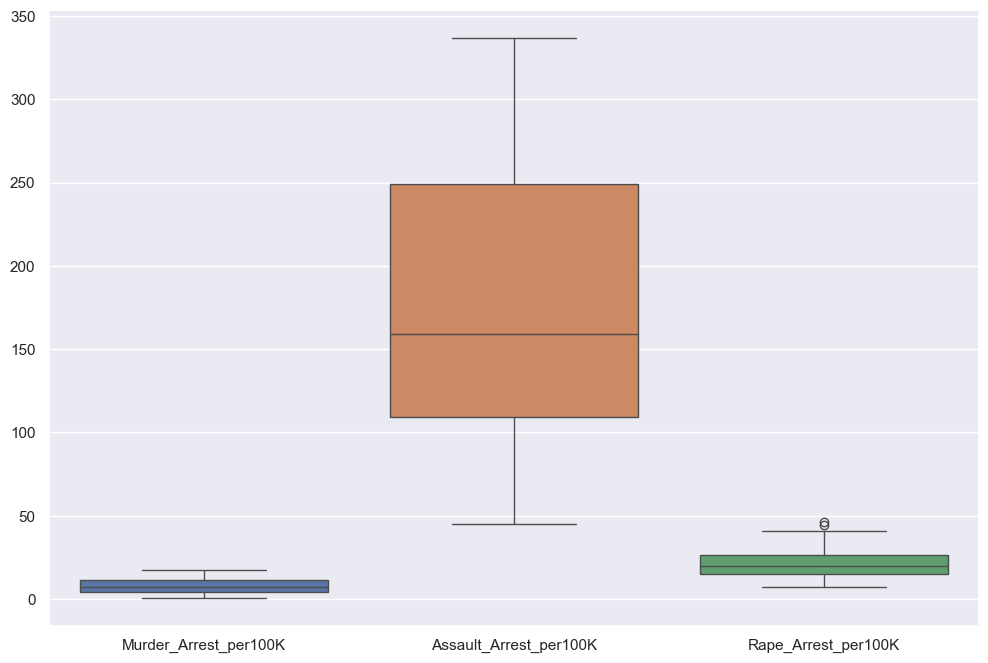

In [67]:
sns.boxplot(data=crime_us_data_df)

In [68]:
# Check if all assault arrest are higher than rape arrest
all(crime_us_data_df["Assault_Arrest_per100K"] > crime_us_data_df["Rape_Arrest_per100K"])

True

## Quick distribution check with normalcy test

Doing a quick distribution check helps us to get a sense on the data distribution. In addition, doing a normalcy test can help us sieve out for non-normally distributed features.

The normalcy test using Shapiro-Wilk Test conducted on the data across states suggest that only the following features
- Assault_Arrest_per100K (Assault Arrest Rate)
- Rape_Arrest_per100K (Rape Arrest Rate)
- Population
- Illiteracy
- Murder_Manslaughter_Rate_per100K (Murder Manslaughter Rate)
- HS Grad
- Area 

do not follow a normal distribution as the null hypothesis of it being normally distributed is rejected at 5% significance test level.

The use of Shapiro-Wilk Test is due to the quote "Although there are various methods for normality testing but for small sample size (n <50), Shapiro–Wilk test should be used as it has more power to detect the nonnormality and this is the most popular and widely used method." from [Descriptive Statistics and Normality Tests for Statistical Data article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6350423/). In our case, 50 data points can be considered almost the same as being small sample size. 

p-value for Assault_Arrest_per100K is < 0.05.The null hypothesis of the values being normal distributed is rejected and thus the feature does not follow a normal distribution.
p-value for Rape_Arrest_per100K is < 0.05.The null hypothesis of the values being normal distributed is rejected and thus the feature does not follow a normal distribution.


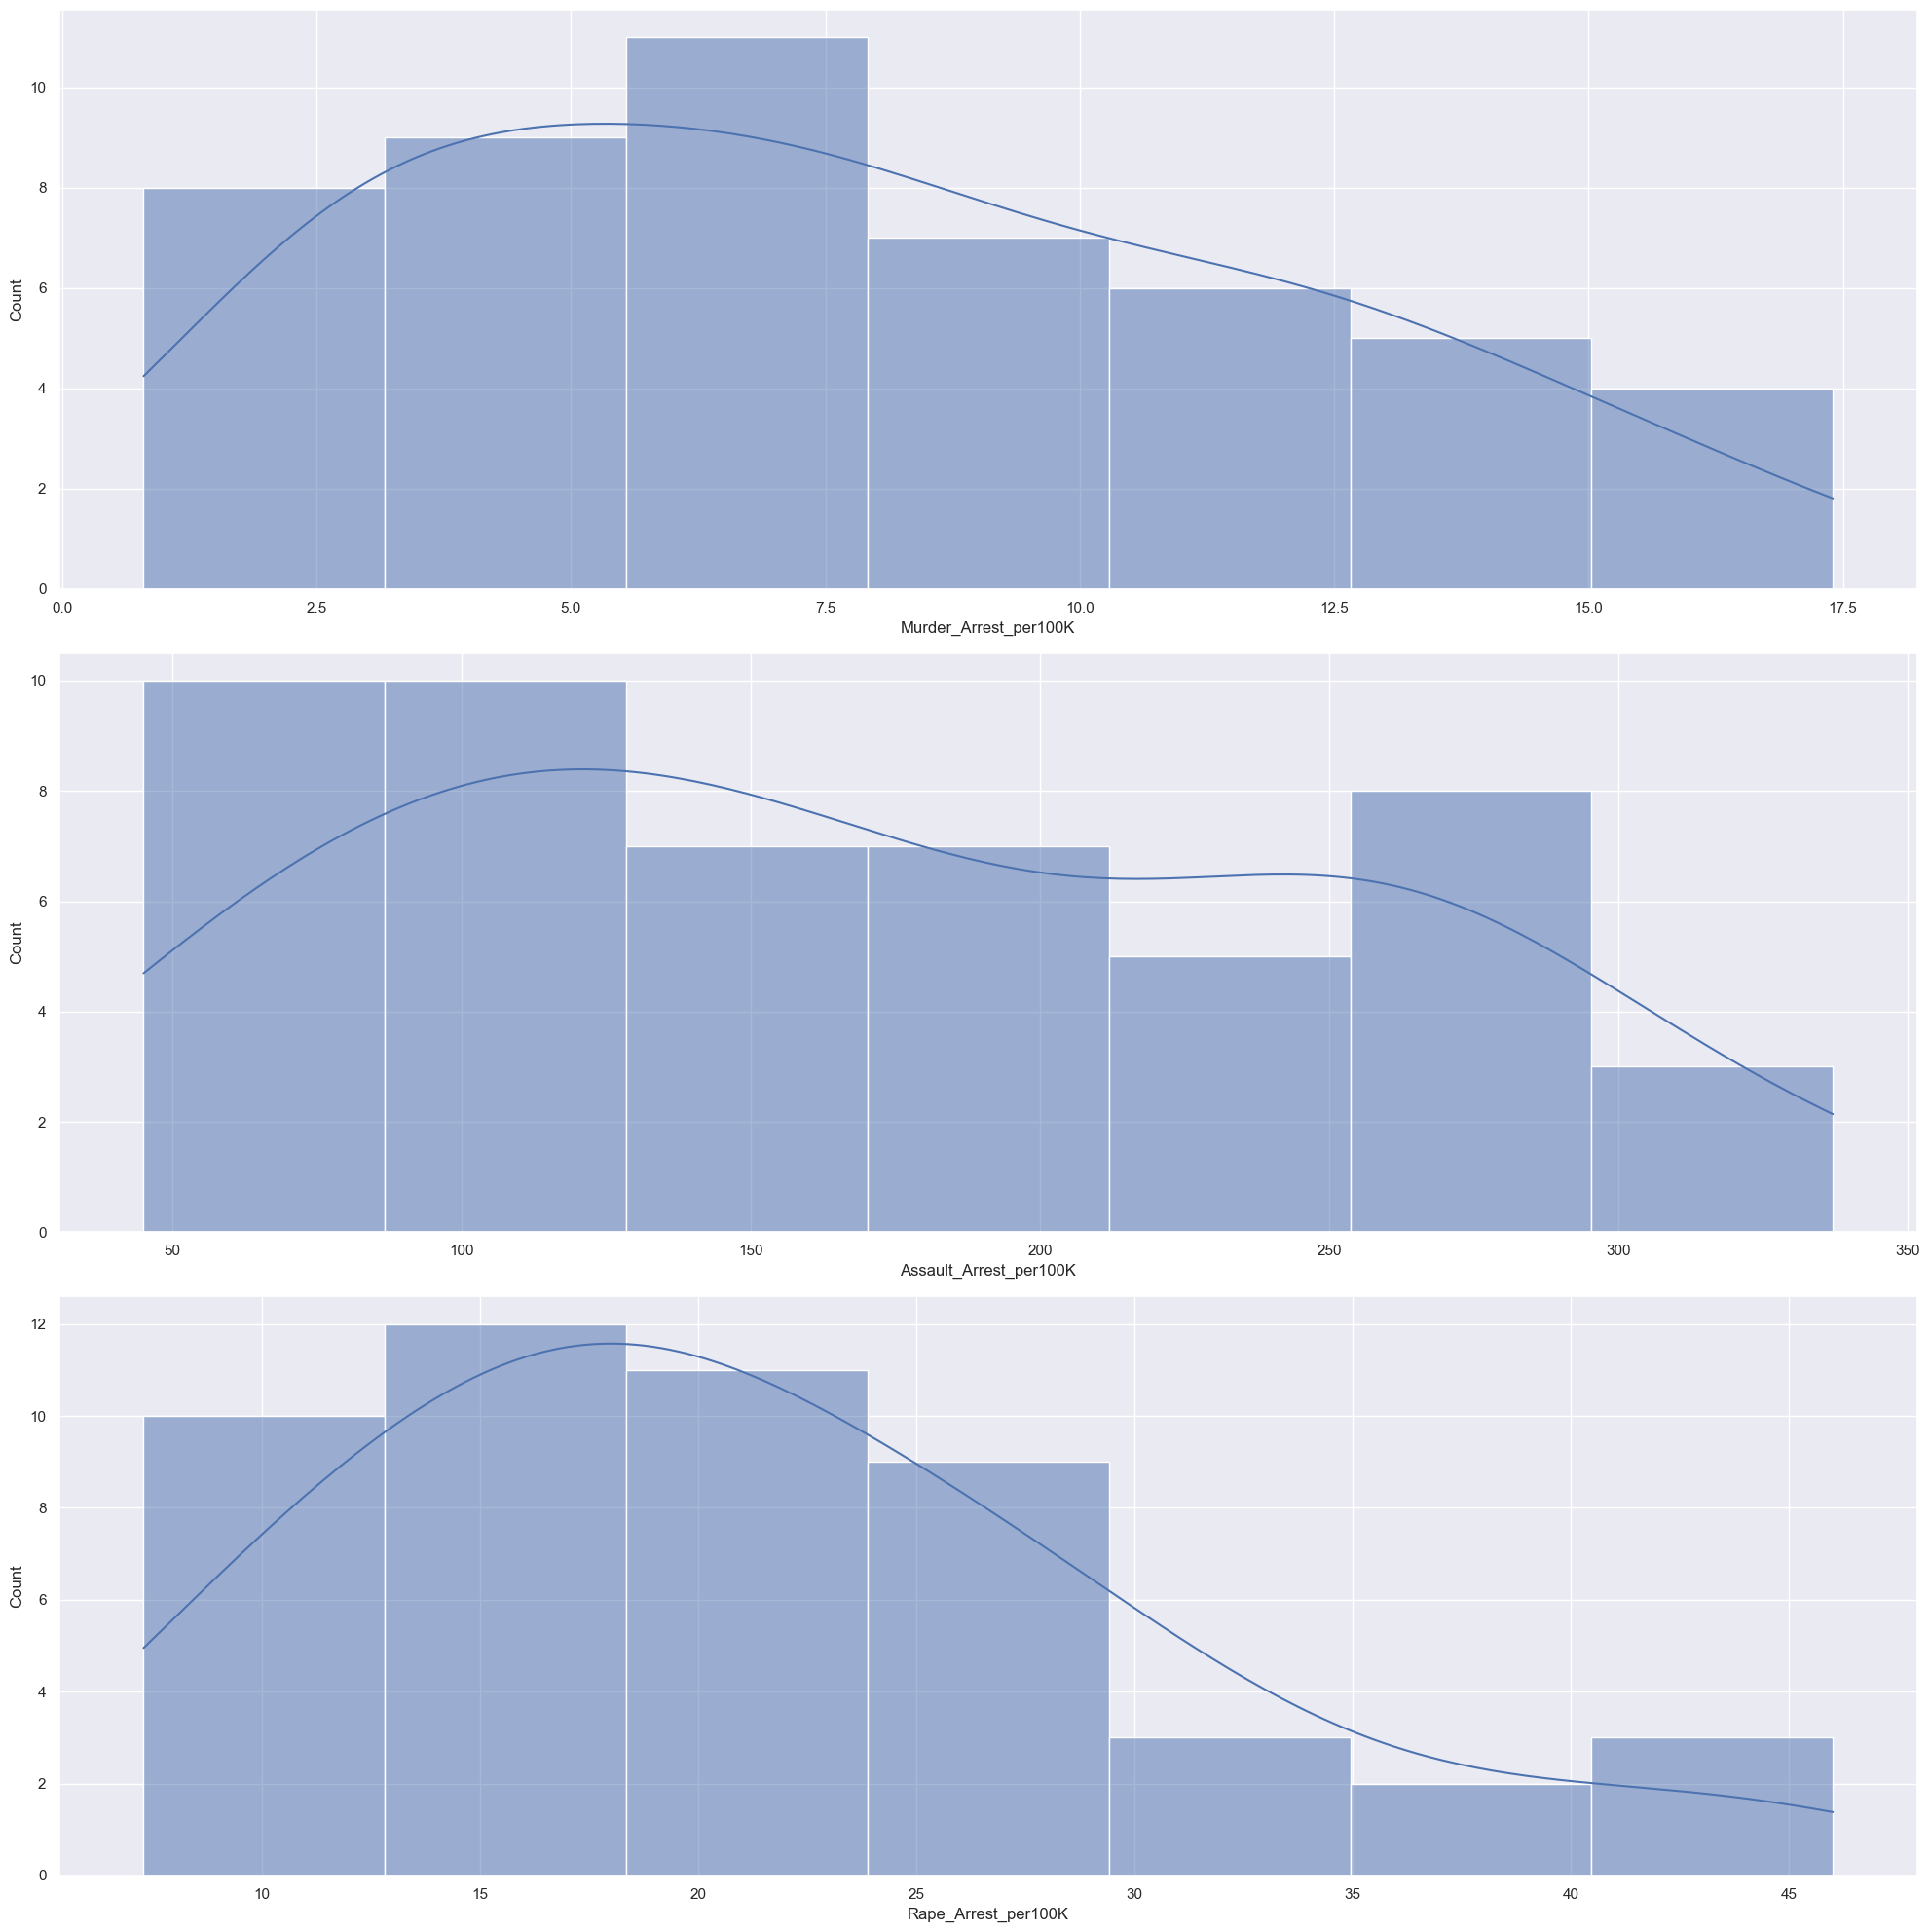

In [77]:
alpha_val = 0.05
fig, ax =plt.subplots(len( arrest_crime_col_list),1, figsize=(20,20))
for index, col in enumerate(arrest_crime_col_list):
    sns.histplot(x=col, data=crime_us_data_df, ax=ax[index], kde=True, alpha_val = 0.05
fig, ax =plt.subplots(len(non_crime_col_list),1, figsize=(20,20))
for index, col in enumerate(non_crime_col_list):
    sns.histplot(x=col, data=non_crime_us_data_df, ax=ax[index], kde=True, bins="sqrt")
    res = stats.shapiro(non_crime_us_data_df[col].values)
    if res.pvalue < alpha_val:
        print(f"p-value for {col} is < {alpha_val}.The null hypothesis of the values being normal distributed is rejected and thus the feature does not follow a normal distribution.")

fig.tight_layout())
    res = stats.shapiro(crime_us_data_df[col].values)
    if res.pvalue < alpha_val:
        print(f"p-value for {col} is < {alpha_val}.The null hypothesis of the values being normal distributed is rejected and thus the feature does not follow a normal distribution.")

fig.tight_layout()

p-value for Population is < 0.05.The null hypothesis of the values being normal distributed is rejected and thus the feature does not follow a normal distribution.
p-value for Illiteracy is < 0.05.The null hypothesis of the values being normal distributed is rejected and thus the feature does not follow a normal distribution.
p-value for Murder_Manslaughter_Rate_per100K is < 0.05.The null hypothesis of the values being normal distributed is rejected and thus the feature does not follow a normal distribution.
p-value for HS Grad is < 0.05.The null hypothesis of the values being normal distributed is rejected and thus the feature does not follow a normal distribution.
p-value for Area is < 0.05.The null hypothesis of the values being normal distributed is rejected and thus the feature does not follow a normal distribution.


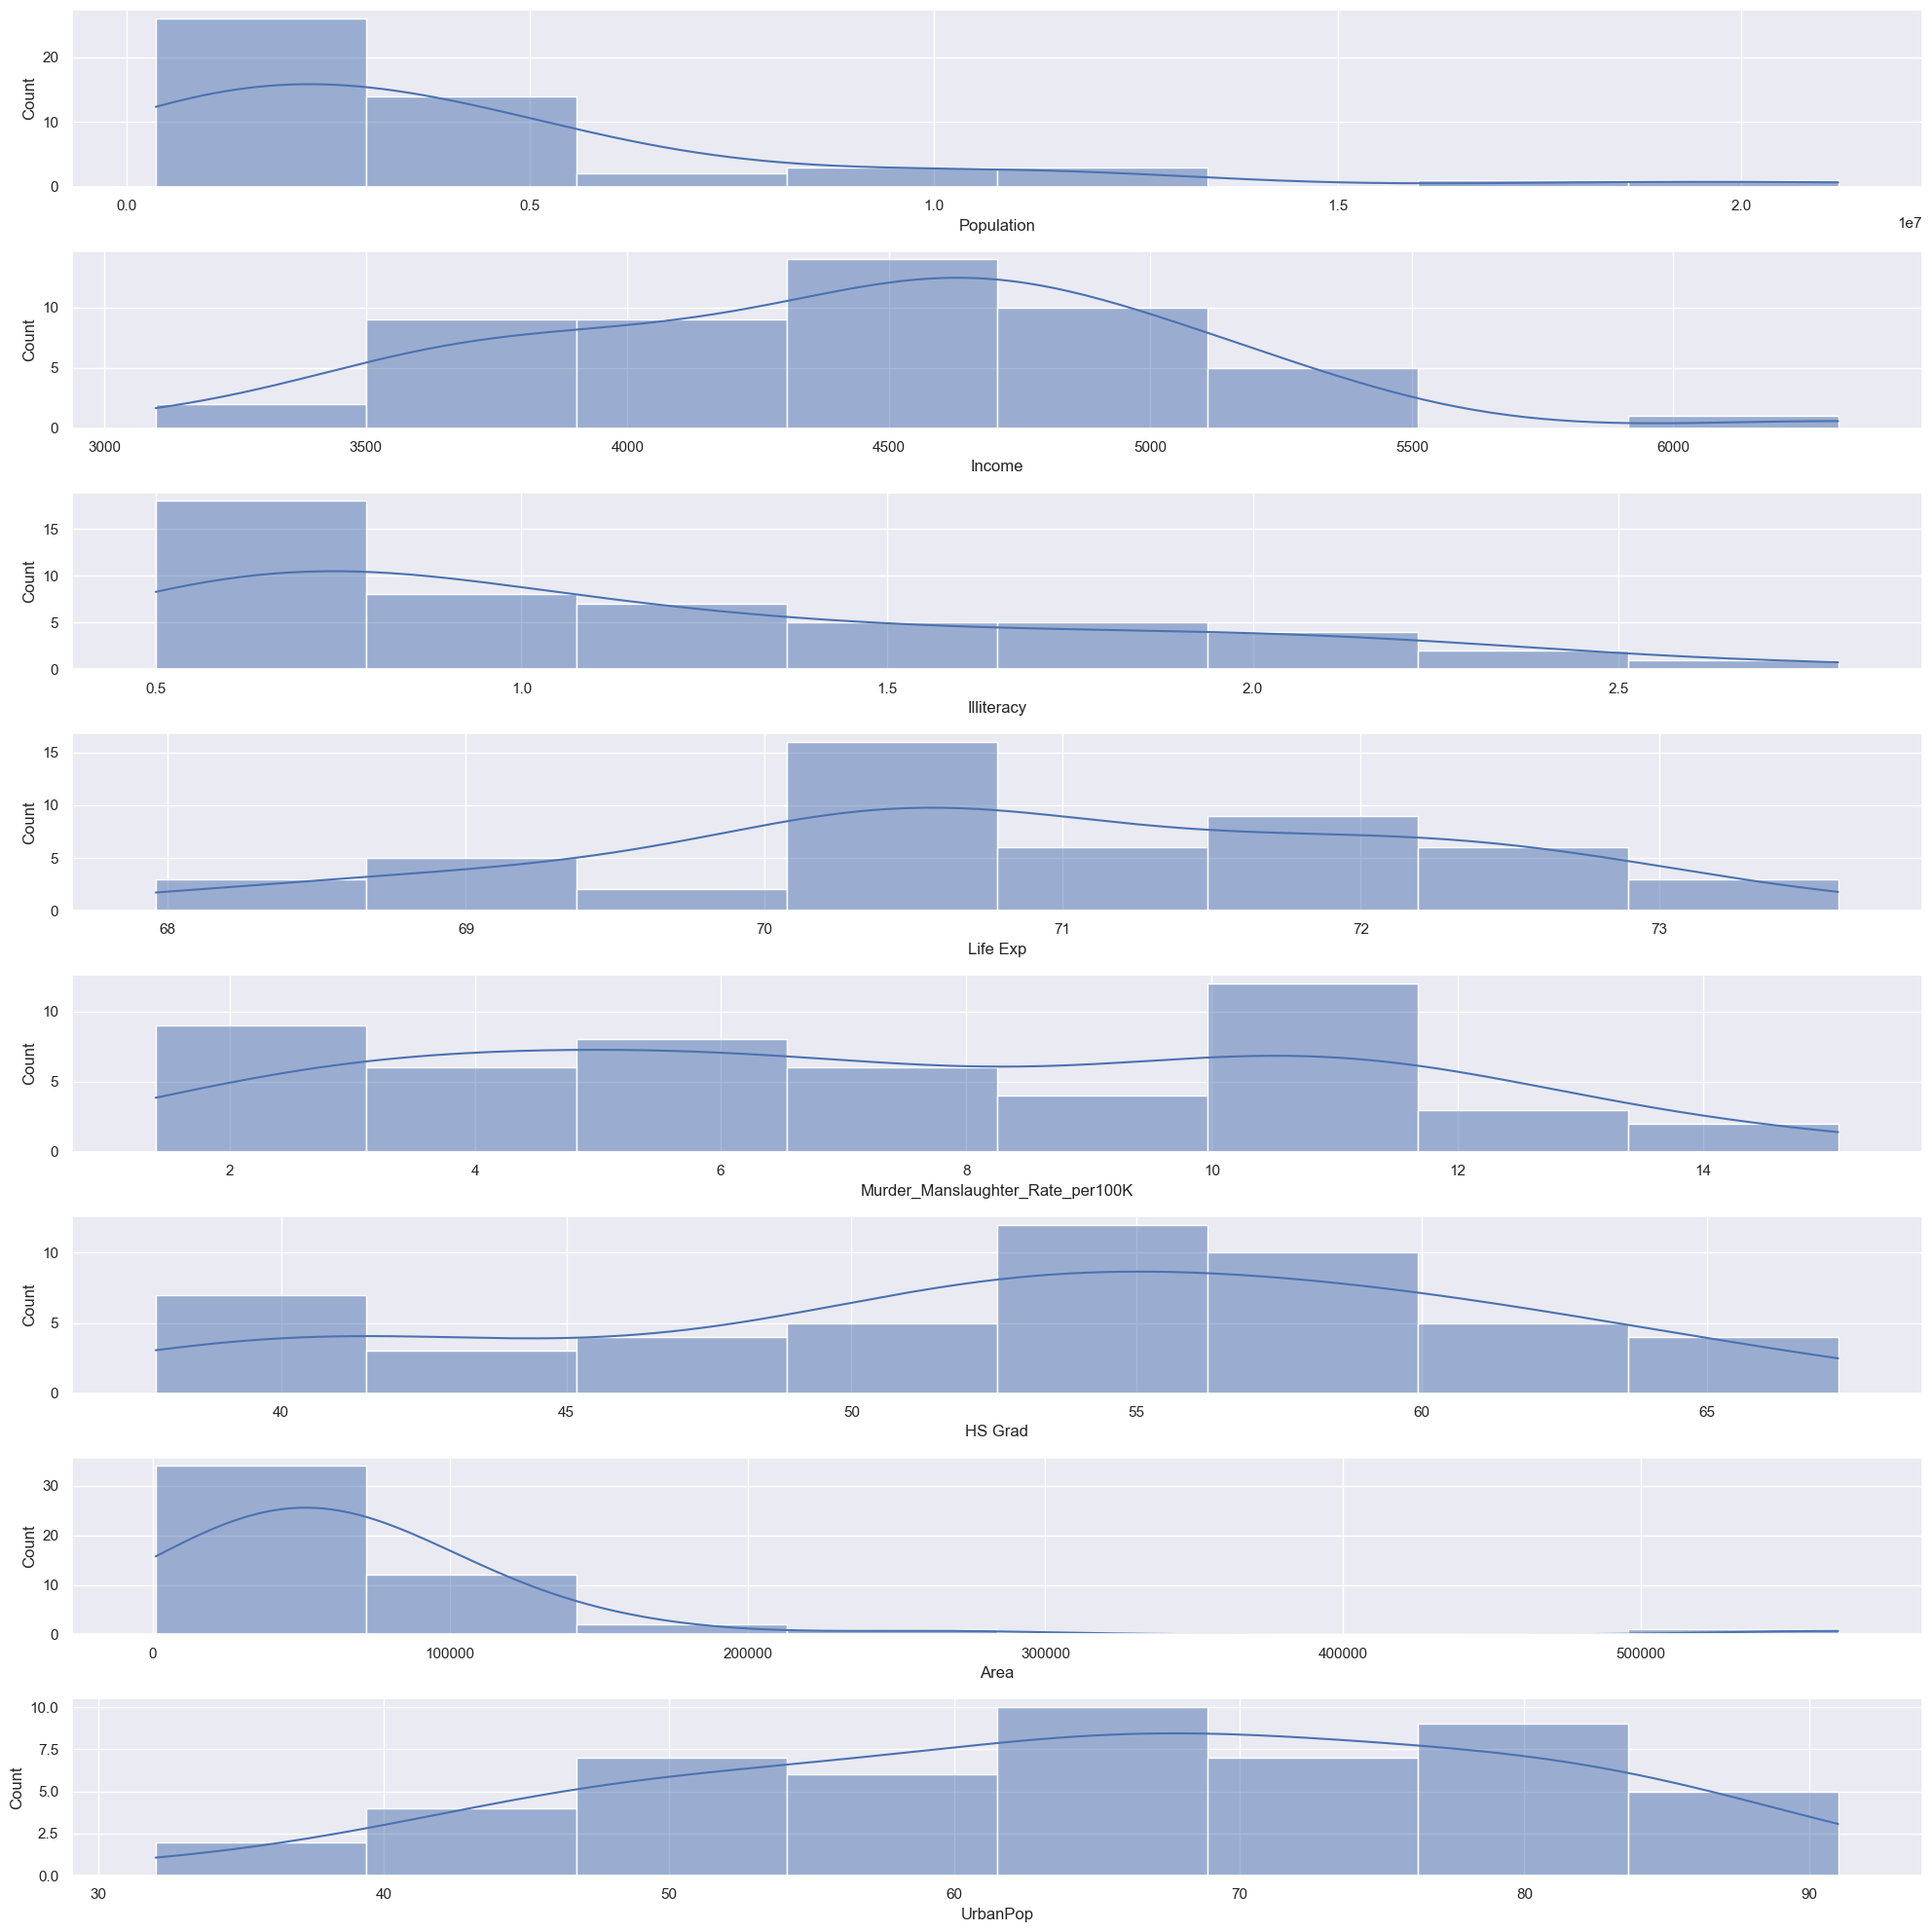

In [79]:
alpha_val = 0.05
fig, ax =plt.subplots(len(non_crime_col_list),1, figsize=(20,20))
for index, col in enumerate(non_crime_col_list):
    sns.histplot(x=col, data=non_crime_us_data_df, ax=ax[index], kde=True, bins="sqrt")
    res = stats.shapiro(non_crime_us_data_df[col].values)
    if res.pvalue < alpha_val:
        print(f"p-value for {col} is < {alpha_val}.The null hypothesis of the values being normal distributed is rejected and thus the feature does not follow a normal distribution.")

fig.tight_layout()

## Question 2.1
Categorise / group the states based on their characteristics.

Since the normalcy test and distribution plot could not prove explicitly some of the features being normally distributed, we could not use standard deviation from mean as an process to categorise the states using the features. Furthermore, the plot does not show distinct

In [ ]:
# Group the states by division
division_data_df = us_data_df.groupby("Division").sum()

C:\Users\quekz\AppData\Local\Temp\ipykernel_21316\2567176439.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  us_data_df.groupby("Division").sum()


,Population,Income,Illiteracy,Life Exp,HS Grad,Area,UrbanPop,Murder_Manslaughter_Rate,Murder_Arrest,Assault_Arrest,Rape_Arrest
Division,,,,,,,,,,,
East North Central,40945000,23345,337965,354.95,21722832,244101,30569090,3472,3550,72430,9791
East South Central,13516000,14255,257232,277.35,5501114,178982,7350050,1655,1731,26130,2840
Middle Atlantic,37269000,14589,452327,211.91,19329597,100318,30610930,3074,3295,70143,7862
Mountain,9625000,35218,104549,567.58,5896529,856047,7052680,680,708,20268,2876
New England,12187000,26543,126079,429.47,6885124,62951,9284210,388,437,15257,1579
Pacific,28274000,25916,290203,358.47,17681060,891972,24314170,2525,2242,68655,10544
South Atlantic,32946000,34842,506155,556.21,15116162,266909,20398590,3477,4267,87294,7855
West North Central,16691000,31988,107412,506.25,9237478,507723,10604340,763,828,17977,3048
West South Central,20868000,15094,445737,281.74,9649300,427791,15202760,2380,2504,42180,4918


In [ ]:
# Group the states by region
region_data_df = us_data_df.groupby("Region").sum()

C:\Users\quekz\AppData\Local\Temp\ipykernel_21316\3746930085.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  us_data_df.groupby("Region").sum()


,Population,Income,Illiteracy,Life Exp,HS Grad,Area,UrbanPop,Murder_Manslaughter_Rate,Murder_Arrest,Assault_Arrest,Rape_Arrest
Region,,,,,,,,,,,
North Central,57636000,55333,445377,861.20,30960310,751824,41173430,4235,4378,90407,12839
Northeast,49456000,41132,578406,641.38,26214721,163269,39895140,3462,3732,85400,9441
South,67330000,64191,1209124,1115.30,30266576,873682,42951400,7512,8502,155604,15613
West,37899000,61134,394752,926.05,23577589,1748019,31366850,3205,2950,88923,13420


## Question 2.2
What factors are statistically significant in predicting Assault rates?
We would need to use a regression model assault rates (dependent factor) as a function of other features (predictor factors), where we need to have a standardised regression coefficient for fair comparison due to the use of common scale.

Side note:
- Statistical significance indicates that an effect you observe in a sample is unlikely to be the product of chance. For statistically significant results, you can conclude that an effect you observe in a sample also exists in the population.

- We can fit a LinearRegression model on the regression dataset and retrieve the coefficients found for each input variable.

- These coefficients can provide the basis for a crude feature importance score. This assumes that the input variables have the same scale or have been scaled prior to fitting a model.
Dataset: USArrest.csv (main). You may wish to use the other datasets to enhance your study.


